**Churn Prediction**

**Life Cycle of a Machine Learning Project**

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model
t model"est model"ect model with best performance and business impact
t model

**Problem Statement**
- The goal of this project is to predict customer churn using historical customer
  data so that the business can take proactive actions to retain customers and reduce revenue loss

**Data Collection**
- Dataset Source : https://www.kaggle.com/datasets/miadul/customer-churn-prediction-business-dataset?resource=download
- The dataset contains 10,000 customer records with 32 features, including demographic details, service usage, billing information, and the churn label.

**Import Data and Required Packages**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Read The Data**

In [6]:
df = pd.read_csv(r'F:\DATA-SCIENCE\ML-Project\Notebook\Data\customer_churn_business_dataset.csv')

In [7]:
df.head()

customer_id  gender  age     country      city customer_segment  \
0  CUST_00001    Male   68  Bangladesh    London              SME   
1  CUST_00002  Female   57      Canada    Sydney       Individual   
2  CUST_00003    Male   24     Germany  New York              SME   
3  CUST_00004    Male   49   Australia     Dhaka       Individual   
4  CUST_00005    Male   65  Bangladesh     Delhi       Individual   

   tenure_months signup_channel contract_type  monthly_logins  ...  \
0             22            Web       Monthly              26  ...   
1              9         Mobile       Monthly               7  ...   
2             58            Web        Yearly              19  ...   
3             19         Mobile        Yearly              34  ...   
4             52            Web       Monthly              20  ...   

   avg_resolution_time  complaint_type  csat_score  escalations  \
0            13.354360         Service         4.0            0   
1            25.140088         Billing         2.0            0   
2            27.572928         Service         3.0            0   
3            26.420822       Technical         5.0            1   
4            26.674579       Technical         4.0            0   

   email_open_rate  marketing_click_rate  nps_score survey_response  \
0             0.71                  0.40         27       Satisfied   
1             0.78                  0.33        -19         Neutral   
2             0.35                  0.49         80         Neutral   
3             0.83                  0.15        100         Neutral   
4             0.65                  0.44         21     Unsatisfied   

   referral_count churn  
0               1     0  
1               2     1  
2               1     0  
3               0     0  
4               1     0  

[5 rows x 32 columns]

In [8]:
df.shape

(10000, 32)

**Data Checks to perform**
-  Check Missing values
-  Check Duplicates
-  Check data type
-  Check the number of unique values of each column
-  Check statistics of data set
-  Check various categories present in the different categorical column

In [9]:
df.isnull().sum()

customer_id                  0
gender                       0
age                          0
country                      0
city                         0
customer_segment             0
tenure_months                0
signup_channel               0
contract_type                0
monthly_logins               0
weekly_active_days           0
avg_session_time             0
features_used                0
usage_growth_rate            0
last_login_days_ago          0
monthly_fee                  0
total_revenue                0
payment_method               0
payment_failures             0
discount_applied             0
price_increase_last_3m       0
support_tickets              0
avg_resolution_time          0
complaint_type            2045
csat_score                   0
escalations                  0
email_open_rate              0
marketing_click_rate         0
nps_score                    0
survey_response              0
referral_count               0
churn                        0
dtype: i

-  there are missing values in dataset ('complaint_type'            2045)
-  complaint_type has null values because those customers did not raise any complaint.

In [10]:
df['complaint_type'].fillna('No Complaint', inplace=True)


In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  object 
 1   gender                  10000 non-null  object 
 2   age                     10000 non-null  int64  
 3   country                 10000 non-null  object 
 4   city                    10000 non-null  object 
 5   customer_segment        10000 non-null  object 
 6   tenure_months           10000 non-null  int64  
 7   signup_channel          10000 non-null  object 
 8   contract_type           10000 non-null  object 
 9   monthly_logins          10000 non-null  int64  
 10  weekly_active_days      10000 non-null  int64  
 11  avg_session_time        10000 non-null  float64
 12  features_used           10000 non-null  int64  
 13  usage_growth_rate       10000 non-null  float64
 14  last_login_days_ago     10000 non-null 

In [13]:
df.nunique()

customer_id               10000
gender                        2
age                          57
country                       7
city                          7
customer_segment              3
tenure_months                59
signup_channel                3
contract_type                 3
monthly_logins               53
weekly_active_days            8
avg_session_time           9777
features_used                15
usage_growth_rate           104
last_login_days_ago          71
monthly_fee                   6
total_revenue               221
payment_method                3
payment_failures              6
discount_applied              2
price_increase_last_3m        2
support_tickets               8
avg_resolution_time        9883
complaint_type                4
csat_score                    5
escalations                   5
email_open_rate              81
marketing_click_rate         50
nps_score                   197
survey_response               3
referral_count                8
churn   

In [14]:
df.describe()

age  tenure_months  monthly_logins  weekly_active_days  \
count  10000.000000   10000.000000    10000.000000        10000.000000   
mean      45.906100      30.155700       19.672000            3.479400   
std       16.420416      17.099517        9.838003            2.302283   
min       18.000000       1.000000        0.000000            0.000000   
25%       32.000000      16.000000       13.000000            1.000000   
50%       46.000000      30.000000       20.000000            3.000000   
75%       60.000000      45.000000       26.000000            5.000000   
max       74.000000      59.000000       54.000000            7.000000   

       avg_session_time  features_used  usage_growth_rate  \
count      10000.000000   10000.000000       10000.000000   
mean          15.187890       4.990800           0.019423   
std            6.830774       2.211607           0.149567   
min            1.000000       1.000000          -0.580000   
25%           10.391645       3.000000          -0.080000   
50%           15.161659       5.000000           0.020000   
75%           19.882034       6.000000           0.120000   
max           41.996411      15.000000           0.540000   

       last_login_days_ago   monthly_fee  total_revenue  payment_failures  \
count         10000.000000  10000.000000   10000.000000      10000.000000   
mean              9.505200     34.930000    1057.018000          0.501000   
std               9.799417     23.785115    1020.148233          0.711934   
min               0.000000     10.000000      10.000000          0.000000   
25%               2.000000     20.000000     340.000000          0.000000   
50%               6.000000     30.000000     720.000000          0.000000   
75%              13.000000     50.000000    1440.000000          1.000000   
max              80.000000    100.000000    5900.000000          5.000000   

       support_tickets  avg_resolution_time    csat_score   escalations  \
count     10000.000000         10000.000000  10000.000000  10000.000000   
mean          1.206600            23.953210      3.486700      0.294100   
std           1.104554             9.956999      0.978631      0.543171   
min           0.000000             1.000000      1.000000      0.000000   
25%           0.000000            17.082041      3.000000      0.000000   
50%           1.000000            23.950444      4.000000      0.000000   
75%           2.000000            30.758480      4.000000      1.000000   
max           7.000000            61.821878      5.000000      4.000000   

       email_open_rate  marketing_click_rate     nps_score  referral_count  \
count     10000.000000          10000.000000  10000.000000      10000.0000   
mean          0.499610              0.253575     19.110500          0.9922   
std           0.231601              0.140532     38.936619          0.9939   
min           0.100000              0.010000   -100.000000          0.0000   
25%           0.300000              0.130000     -7.000000          0.0000   
50%           0.500000              0.250000     19.000000          1.0000   
75%           0.700000              0.380000     46.000000          2.0000   
max           0.900000              0.500000    100.000000          7.0000   

              churn  
count  10000.000000  
mean       0.102100  
std        0.302795  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

**Insights**
-  Most customers are mid-tenure and moderately active

-  Low churn (10%) → retention is fairly strong

-  Higher support tickets & lower CSAT indicate churn risk

-  Revenue and engagement vary widely → good scope for segmentation

-  Complaint-related features are useful churn indicators

In [16]:
df.head()

customer_id  gender  age     country      city customer_segment  \
0  CUST_00001    Male   68  Bangladesh    London              SME   
1  CUST_00002  Female   57      Canada    Sydney       Individual   
2  CUST_00003    Male   24     Germany  New York              SME   
3  CUST_00004    Male   49   Australia     Dhaka       Individual   
4  CUST_00005    Male   65  Bangladesh     Delhi       Individual   

   tenure_months signup_channel contract_type  monthly_logins  ...  \
0             22            Web       Monthly              26  ...   
1              9         Mobile       Monthly               7  ...   
2             58            Web        Yearly              19  ...   
3             19         Mobile        Yearly              34  ...   
4             52            Web       Monthly              20  ...   

   avg_resolution_time  complaint_type  csat_score  escalations  \
0            13.354360         Service         4.0            0   
1            25.140088         Billing         2.0            0   
2            27.572928         Service         3.0            0   
3            26.420822       Technical         5.0            1   
4            26.674579       Technical         4.0            0   

   email_open_rate  marketing_click_rate  nps_score survey_response  \
0             0.71                  0.40         27       Satisfied   
1             0.78                  0.33        -19         Neutral   
2             0.35                  0.49         80         Neutral   
3             0.83                  0.15        100         Neutral   
4             0.65                  0.44         21     Unsatisfied   

   referral_count churn  
0               1     0  
1               2     1  
2               1     0  
3               0     0  
4               1     0  

[5 rows x 32 columns]

In [15]:
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'country' variable:    ", end=" ")
print(df['country'].unique())

print("Categories in 'city' variable:       ", end=" ")
print(df['city'].unique())

print("Categories in 'customer_segment' variable: ", end=" ")
print(df['customer_segment'].unique())

print("Categories in 'signup_channel' variable:   ", end=" ")
print(df['signup_channel'].unique())

print("Categories in 'contract_type' variable:    ", end=" ")
print(df['contract_type'].unique())

print("Categories in 'payment_method' variable:   ", end=" ")
print(df['payment_method'].unique())

print("Categories in 'complaint_type' variable:   ", end=" ")
print(df['complaint_type'].fillna('No Complaint').unique())

print("Categories in 'discount_applied' variable: ", end=" ")
print(df['discount_applied'].unique())

print("Categories in 'churn' variable:            ", end=" ")
print(df['churn'].unique())


Categories in 'gender' variable:      ['Male' 'Female']
Categories in 'country' variable:     ['Bangladesh' 'Canada' 'Germany' 'Australia' 'India' 'USA' 'UK']
Categories in 'city' variable:        ['London' 'Sydney' 'New York' 'Dhaka' 'Delhi' 'Toronto' 'Berlin']
Categories in 'customer_segment' variable:  ['SME' 'Individual' 'Enterprise']
Categories in 'signup_channel' variable:    ['Web' 'Mobile' 'Referral']
Categories in 'contract_type' variable:     ['Monthly' 'Yearly' 'Quarterly']
Categories in 'payment_method' variable:    ['PayPal' 'Card' 'Bank Transfer']
Categories in 'complaint_type' variable:    ['Service' 'Billing' 'Technical' 'No Complaint']
Categories in 'discount_applied' variable:  ['Yes' 'No']
Categories in 'churn' variable:             [0 1]


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 20 numerical features : ['age', 'tenure_months', 'monthly_logins', 'weekly_active_days', 'avg_session_time', 'features_used', 'usage_growth_rate', 'last_login_days_ago', 'monthly_fee', 'total_revenue', 'payment_failures', 'support_tickets', 'avg_resolution_time', 'csat_score', 'escalations', 'email_open_rate', 'marketing_click_rate', 'nps_score', 'referral_count', 'churn']

We have 12 categorical features : ['customer_id', 'gender', 'country', 'city', 'customer_segment', 'signup_channel', 'contract_type', 'payment_method', 'discount_applied', 'price_increase_last_3m', 'complaint_type', 'survey_response']


In [18]:
df['total_engagement_score'] = (
    df['monthly_logins'] +
    df['weekly_active_days'] +
    df['features_used']
)
df.head()

customer_id  gender  age     country      city customer_segment  \
0  CUST_00001    Male   68  Bangladesh    London              SME   
1  CUST_00002  Female   57      Canada    Sydney       Individual   
2  CUST_00003    Male   24     Germany  New York              SME   
3  CUST_00004    Male   49   Australia     Dhaka       Individual   
4  CUST_00005    Male   65  Bangladesh     Delhi       Individual   

   tenure_months signup_channel contract_type  monthly_logins  ...  \
0             22            Web       Monthly              26  ...   
1              9         Mobile       Monthly               7  ...   
2             58            Web        Yearly              19  ...   
3             19         Mobile        Yearly              34  ...   
4             52            Web       Monthly              20  ...   

   complaint_type  csat_score  escalations  email_open_rate  \
0         Service         4.0            0             0.71   
1         Billing         2.0            0             0.78   
2         Service         3.0            0             0.35   
3       Technical         5.0            1             0.83   
4       Technical         4.0            0             0.65   

   marketing_click_rate  nps_score  survey_response referral_count  churn  \
0                  0.40         27        Satisfied              1      0   
1                  0.33        -19          Neutral              2      1   
2                  0.49         80          Neutral              1      0   
3                  0.15        100          Neutral              0      0   
4                  0.44         21      Unsatisfied              1      0   

  total_engagement_score  
0                     38  
1                     13  
2                     30  
3                     43  
4                     28  

[5 rows x 33 columns]

In [22]:
max_login = df['monthly_logins'].max()
high_login_users = df[df['monthly_logins'] == max_login].shape[0]

print(f'Number of customers with maximum monthly logins: {high_login_users}')

csat_full = df[df['csat_score'] == 5].shape[0]
print(f'Number of customers with full CSAT score (5): {csat_full}')
no_support = df[(df['support_tickets'] == 0) & (df['escalations'] == 0)].shape[0]
print(f'Number of customers with no support issues: {no_support}')
max_revenue = df['total_revenue'].max()
top_revenue_customers = df[df['total_revenue'] == max_revenue].shape[0]

print(f'Number of customers with maximum total revenue: {top_revenue_customers}')


Number of customers with maximum monthly logins: 1
Number of customers with full CSAT score (5): 1554
Number of customers with no support issues: 2244
Number of customers with maximum total revenue: 10


In [24]:
low_login = df[df['monthly_logins'] <= 5]['churn'].count()
print(f'Number of customers with very low monthly logins (≤5): {low_login}')
low_csat = df[df['csat_score'] <= 2]['churn'].count()
print(f'Number of customers with low CSAT score (≤2): {low_csat}')
high_support = df[df['support_tickets'] >= 4]['churn'].count()
print(f'Number of customers with high support tickets (≥4): {high_support}')
inactive_users = df[df['last_login_days_ago'] >= 30]['churn'].count()
print(f'Number of inactive customers (≥30 days since last login): {inactive_users}')


Number of customers with very low monthly logins (≤5): 793
Number of customers with low CSAT score (≤2): 1543
Number of customers with high support tickets (≥4): 347
Number of inactive customers (≥30 days since last login): 471


**Exploring Data ( Visualization )**
-  4.1 Visualize average score distribution to make some conclusion.
-  Histogram
-  Kernel Distribution Function (KDE)

**Histogram & KDE**

In [28]:
df.head()

customer_id  gender  age     country      city customer_segment  \
0  CUST_00001    Male   68  Bangladesh    London              SME   
1  CUST_00002  Female   57      Canada    Sydney       Individual   
2  CUST_00003    Male   24     Germany  New York              SME   
3  CUST_00004    Male   49   Australia     Dhaka       Individual   
4  CUST_00005    Male   65  Bangladesh     Delhi       Individual   

   tenure_months signup_channel contract_type  monthly_logins  ...  \
0             22            Web       Monthly              26  ...   
1              9         Mobile       Monthly               7  ...   
2             58            Web        Yearly              19  ...   
3             19         Mobile        Yearly              34  ...   
4             52            Web       Monthly              20  ...   

   complaint_type  csat_score  escalations  email_open_rate  \
0         Service         4.0            0             0.71   
1         Billing         2.0            0             0.78   
2         Service         3.0            0             0.35   
3       Technical         5.0            1             0.83   
4       Technical         4.0            0             0.65   

   marketing_click_rate  nps_score  survey_response referral_count  churn  \
0                  0.40         27        Satisfied              1      0   
1                  0.33        -19          Neutral              2      1   
2                  0.49         80          Neutral              1      0   
3                  0.15        100          Neutral              0      0   
4                  0.44         21      Unsatisfied              1      0   

  total_engagement_score  
0                     38  
1                     13  
2                     30  
3                     43  
4                     28  

[5 rows x 33 columns]

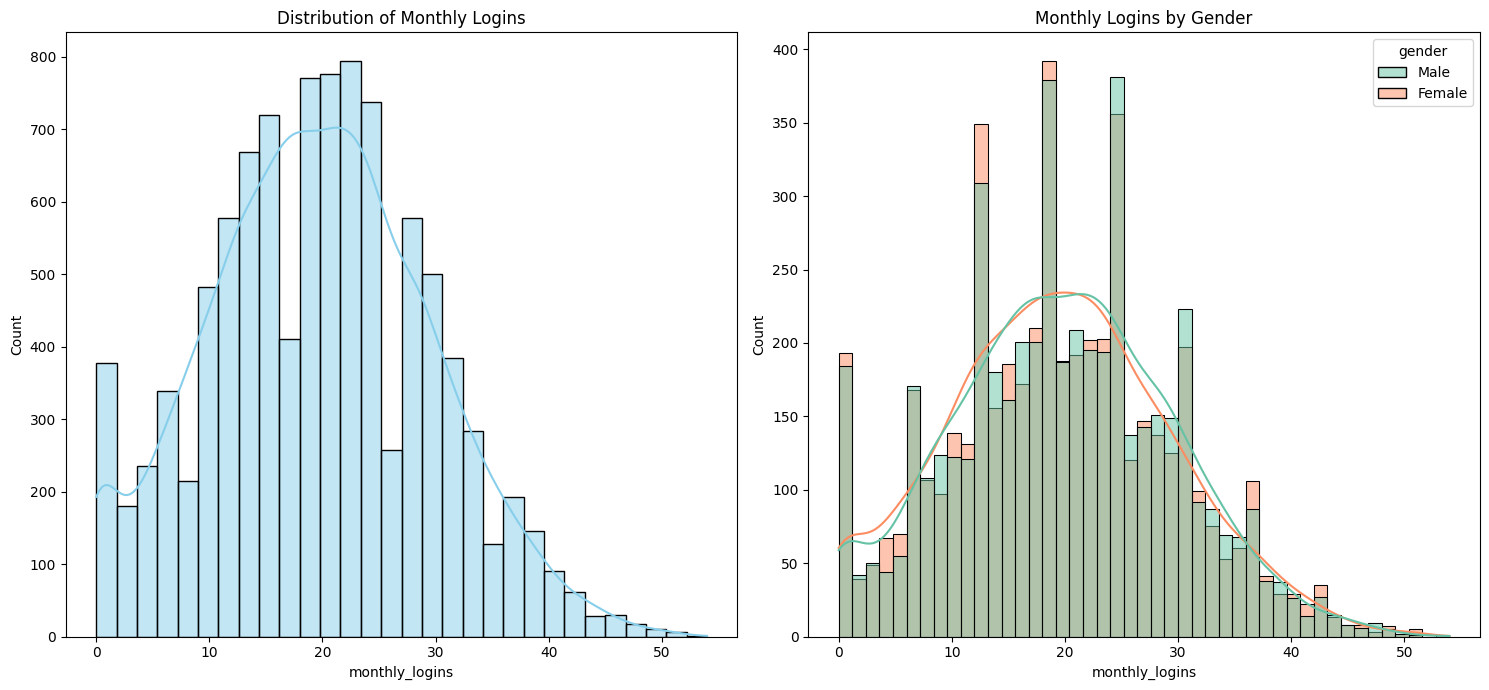

In [29]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 1. Histogram of monthly_logins
plt.subplot(121)
sns.histplot(data=df, x='monthly_logins', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Logins')

# 2. Histogram of monthly_logins by gender
plt.subplot(122)
sns.histplot(data=df, x='monthly_logins', kde=True, hue='gender', palette='Set2')
plt.title('Monthly Logins by Gender')

plt.tight_layout()
plt.show()


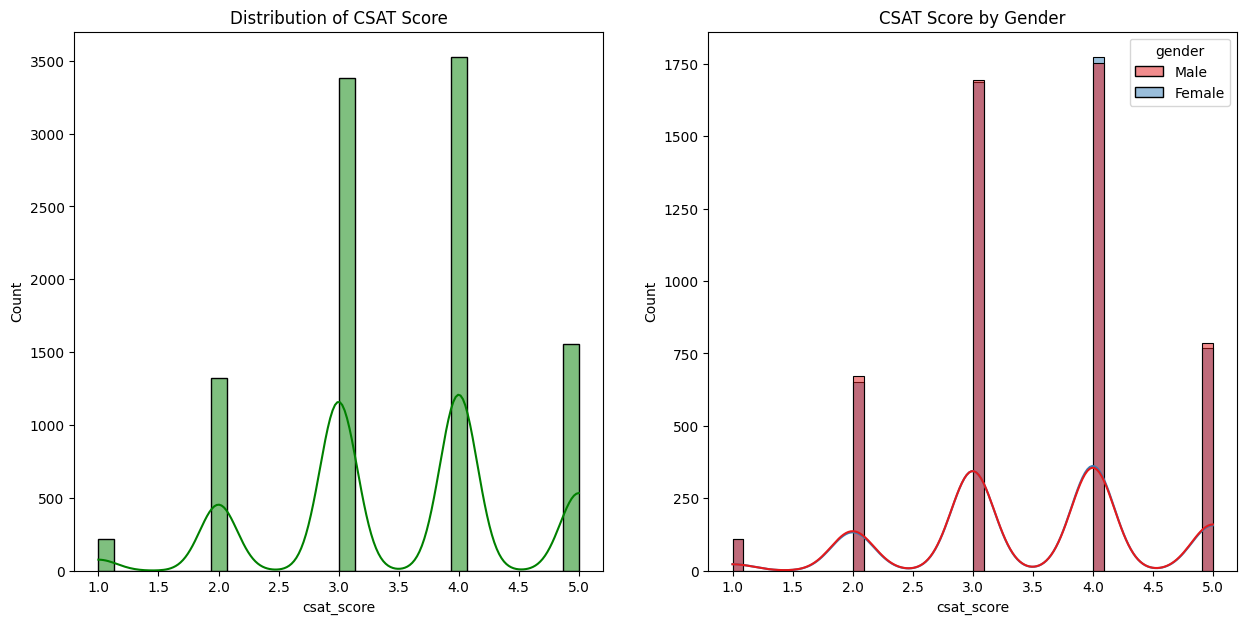

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Histogram of CSAT Score
plt.subplot(121)
sns.histplot(data=df, x='csat_score', bins=30, kde=True, color='g')
plt.title('Distribution of CSAT Score')

# Histogram of CSAT Score by Gender
plt.subplot(122)
sns.histplot(data=df, x='csat_score', kde=True, hue='gender', palette='Set1')
plt.title('CSAT Score by Gender')

plt.show()


gender
Male      5013
Female    4987
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


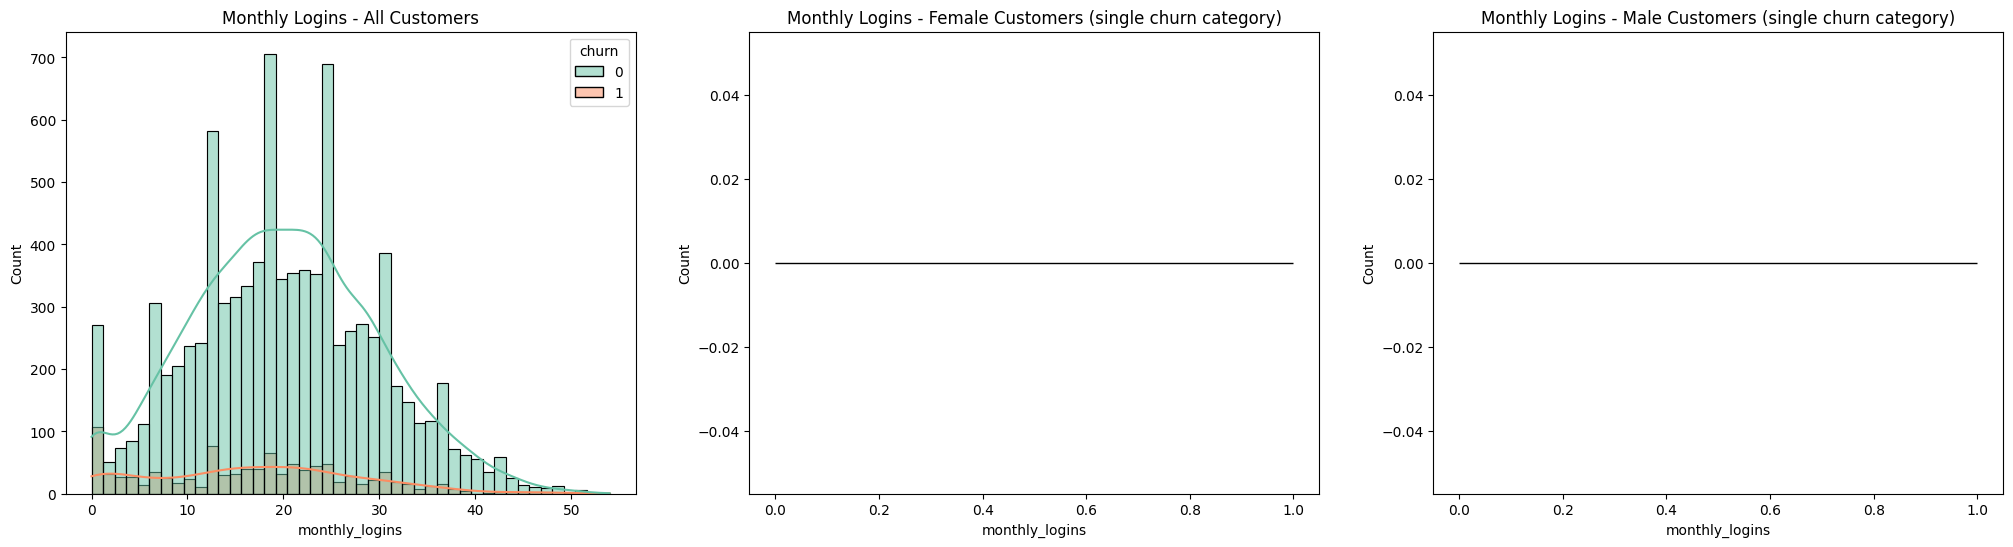

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check counts first
print(df['gender'].value_counts())
print(df[df.gender=='female']['churn'].value_counts())

plt.subplots(1, 3, figsize=(25, 6))

# 1. All customers
plt.subplot(131)
sns.histplot(data=df, x='monthly_logins', kde=True, hue='churn', palette='Set2')
plt.title('Monthly Logins - All Customers')

# 2. Female customers (only if more than 1 churn category exists)
female_df = df[df.gender=='female']
if female_df['churn'].nunique() > 1:
    plt.subplot(132)
    sns.histplot(data=female_df, x='monthly_logins', kde=True, hue='churn', palette='Set2')
    plt.title('Monthly Logins - Female Customers')
else:
    plt.subplot(132)
    sns.histplot(data=female_df, x='monthly_logins', kde=True, color='pink')
    plt.title('Monthly Logins - Female Customers (single churn category)')

# 3. Male customers
male_df = df[df.gender=='male']
if male_df['churn'].nunique() > 1:
    plt.subplot(133)
    sns.histplot(data=male_df, x='monthly_logins', kde=True, hue='churn', palette='Set2')
    plt.title('Monthly Logins - Male Customers')
else:
    plt.subplot(133)
    sns.histplot(data=male_df, x='monthly_logins', kde=True, color='skyblue')
    plt.title('Monthly Logins - Male Customers (single churn category)')

plt.show()


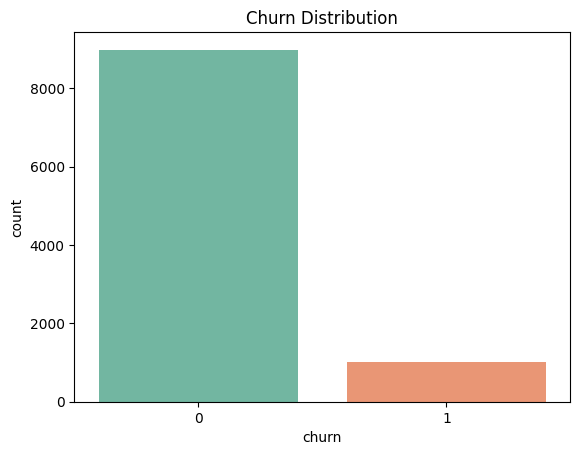

In [36]:
sns.countplot(x='churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.show()


**Demographic Analysis**

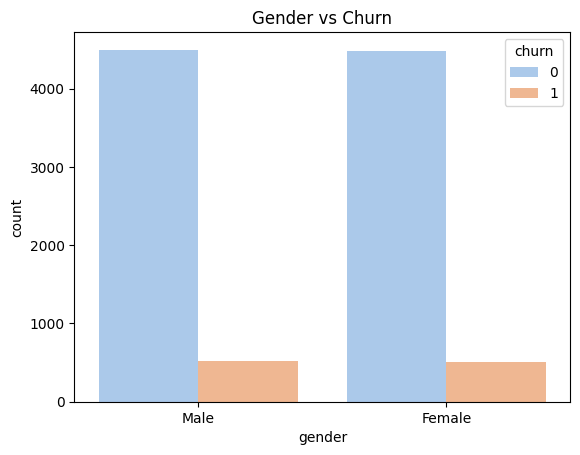

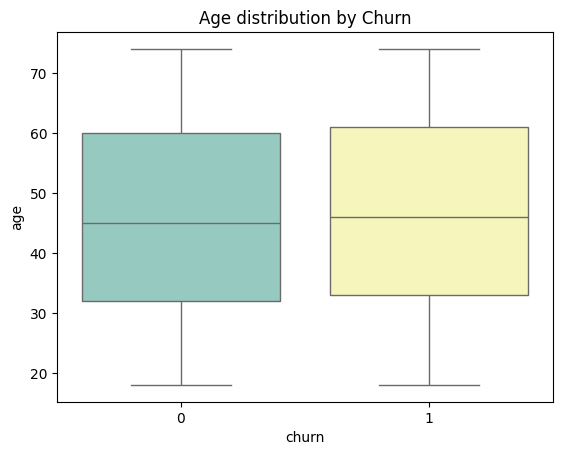

In [37]:
sns.countplot(x='gender', hue='churn', data=df, palette='pastel')
plt.title("Gender vs Churn")
plt.show()

sns.boxplot(x='churn', y='age', data=df, palette='Set3')
plt.title("Age distribution by Churn")
plt.show()


**Insights:**

-  Check if a particular gender or age group is more likely to churn.

**Contract & Tenure Analysis**

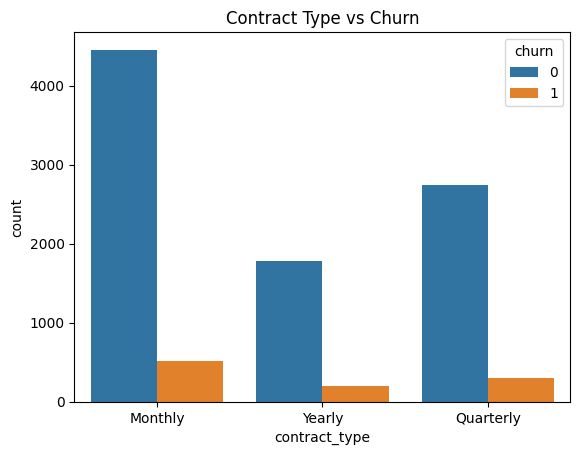

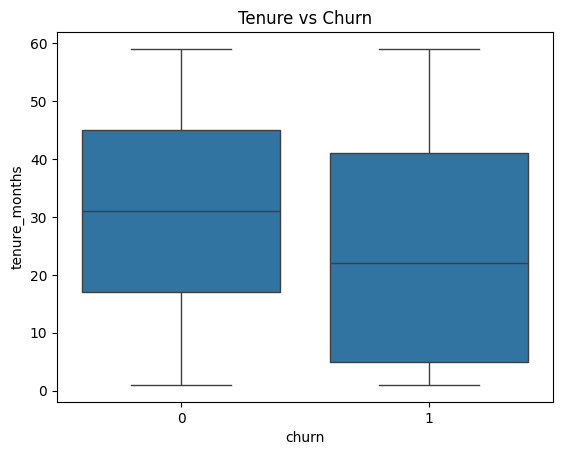

In [38]:
sns.countplot(x='contract_type', hue='churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()

sns.boxplot(x='churn', y='tenure_months', data=df)
plt.title("Tenure vs Churn")
plt.show()


**Insights:**

-  Customers on monthly contracts are more likely to churn.

-  Longer tenure = less churn.

**Engagement Metrics**

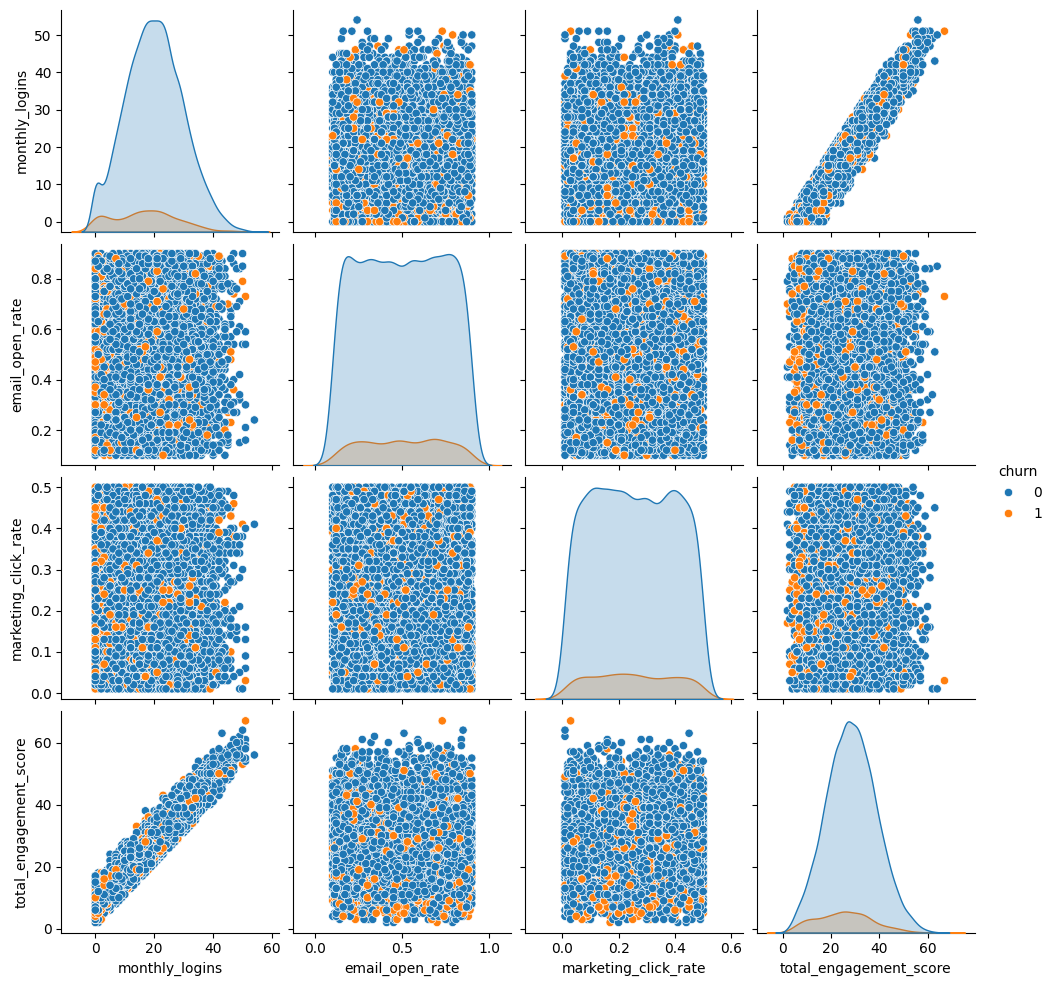

In [39]:
engagement_features = ['monthly_logins','email_open_rate','marketing_click_rate','total_engagement_score']

sns.pairplot(df, vars=engagement_features, hue='churn')
plt.show()


**Insight:**
-  Low engagement (few logins, low email opens, low clicks) → higher churn risk

**CSAT / NPS / Complaint Analysis**

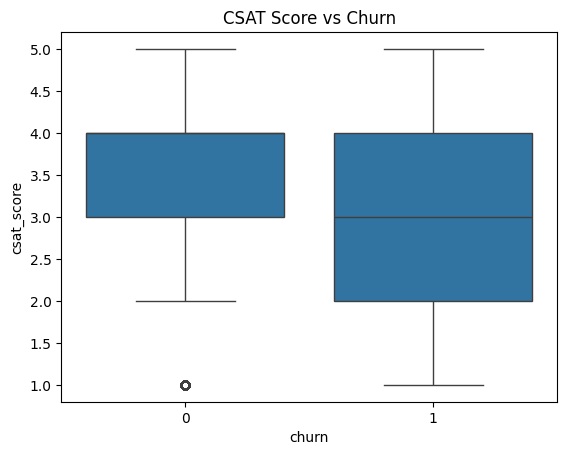

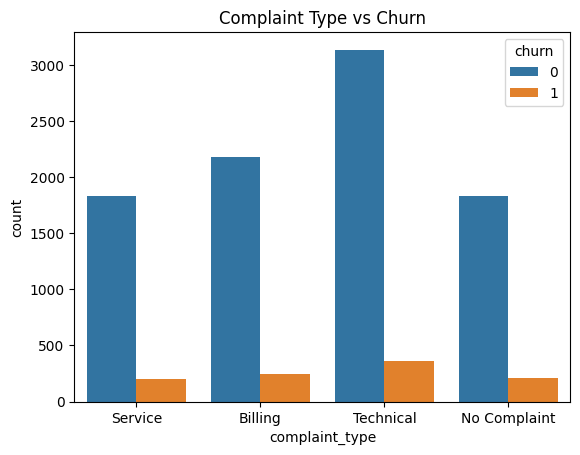

In [40]:
sns.boxplot(x='churn', y='csat_score', data=df)
plt.title("CSAT Score vs Churn")
plt.show()

sns.countplot(x='complaint_type', hue='churn', data=df)
plt.title("Complaint Type vs Churn")
plt.show()


**Insight:**

-  Low satisfaction and more complaints → higher churn probability.

**Correlation Heatmap**

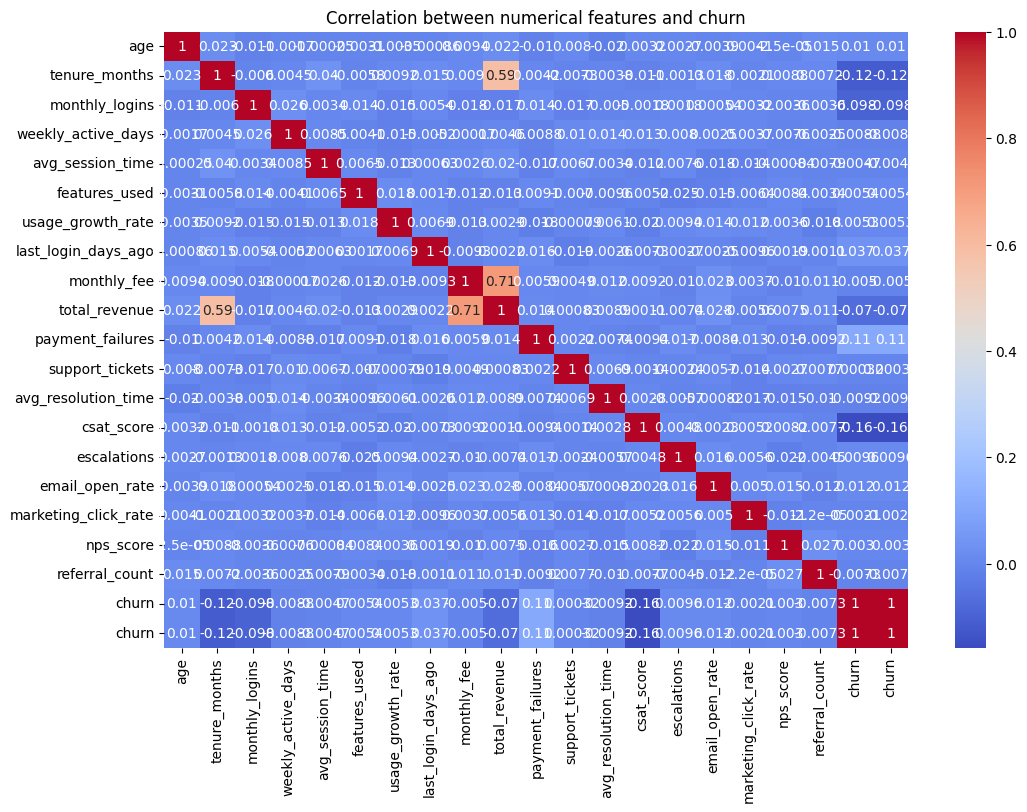

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_features + ['churn']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between numerical features and churn")
plt.show()


**Insight:**
-  Identify highly correlated predictors with churn (tenure_months, total_engagement_score, csat_score).

**CHECKING OUTLIERS**

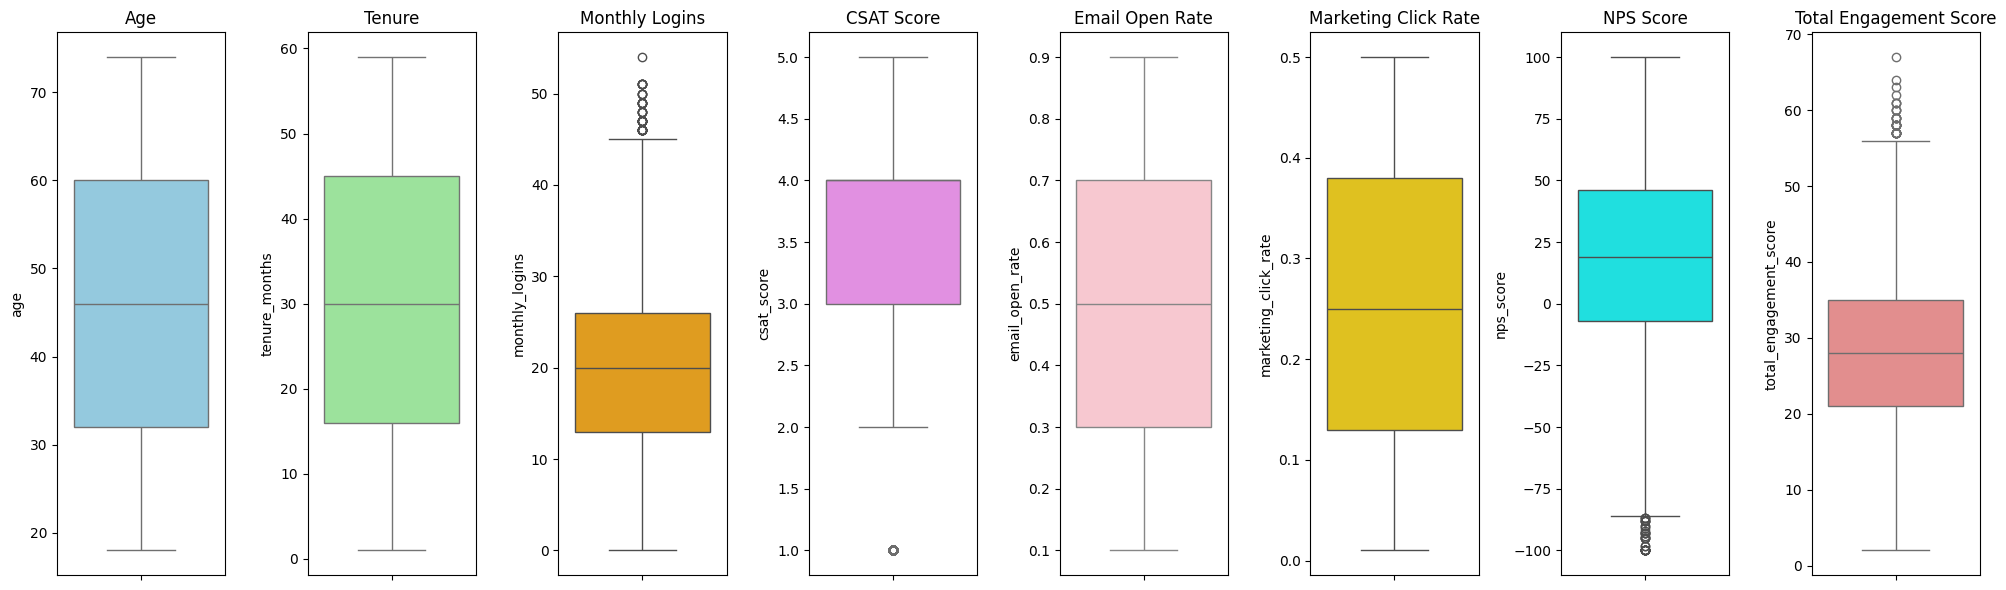

In [43]:
plt.figure(figsize=(20,6))

plt.subplot(1,8,1)
sns.boxplot(y=df['age'], color='skyblue')
plt.title('Age')

plt.subplot(1,8,2)
sns.boxplot(y=df['tenure_months'], color='lightgreen')
plt.title('Tenure')

plt.subplot(1,8,3)
sns.boxplot(y=df['monthly_logins'], color='orange')
plt.title('Monthly Logins')

plt.subplot(1,8,4)
sns.boxplot(y=df['csat_score'], color='violet')
plt.title('CSAT Score')

plt.subplot(1,8,5)
sns.boxplot(y=df['email_open_rate'], color='pink')
plt.title('Email Open Rate')

plt.subplot(1,8,6)
sns.boxplot(y=df['marketing_click_rate'], color='gold')
plt.title('Marketing Click Rate')

plt.subplot(1,8,7)
sns.boxplot(y=df['nps_score'], color='cyan')
plt.title('NPS Score')

plt.subplot(1,8,8)
sns.boxplot(y=df['total_engagement_score'], color='lightcoral')
plt.title('Total Engagement Score')

plt.tight_layout()
plt.show()


 **MUTIVARIATE ANALYSIS USING PAIRPLOT**

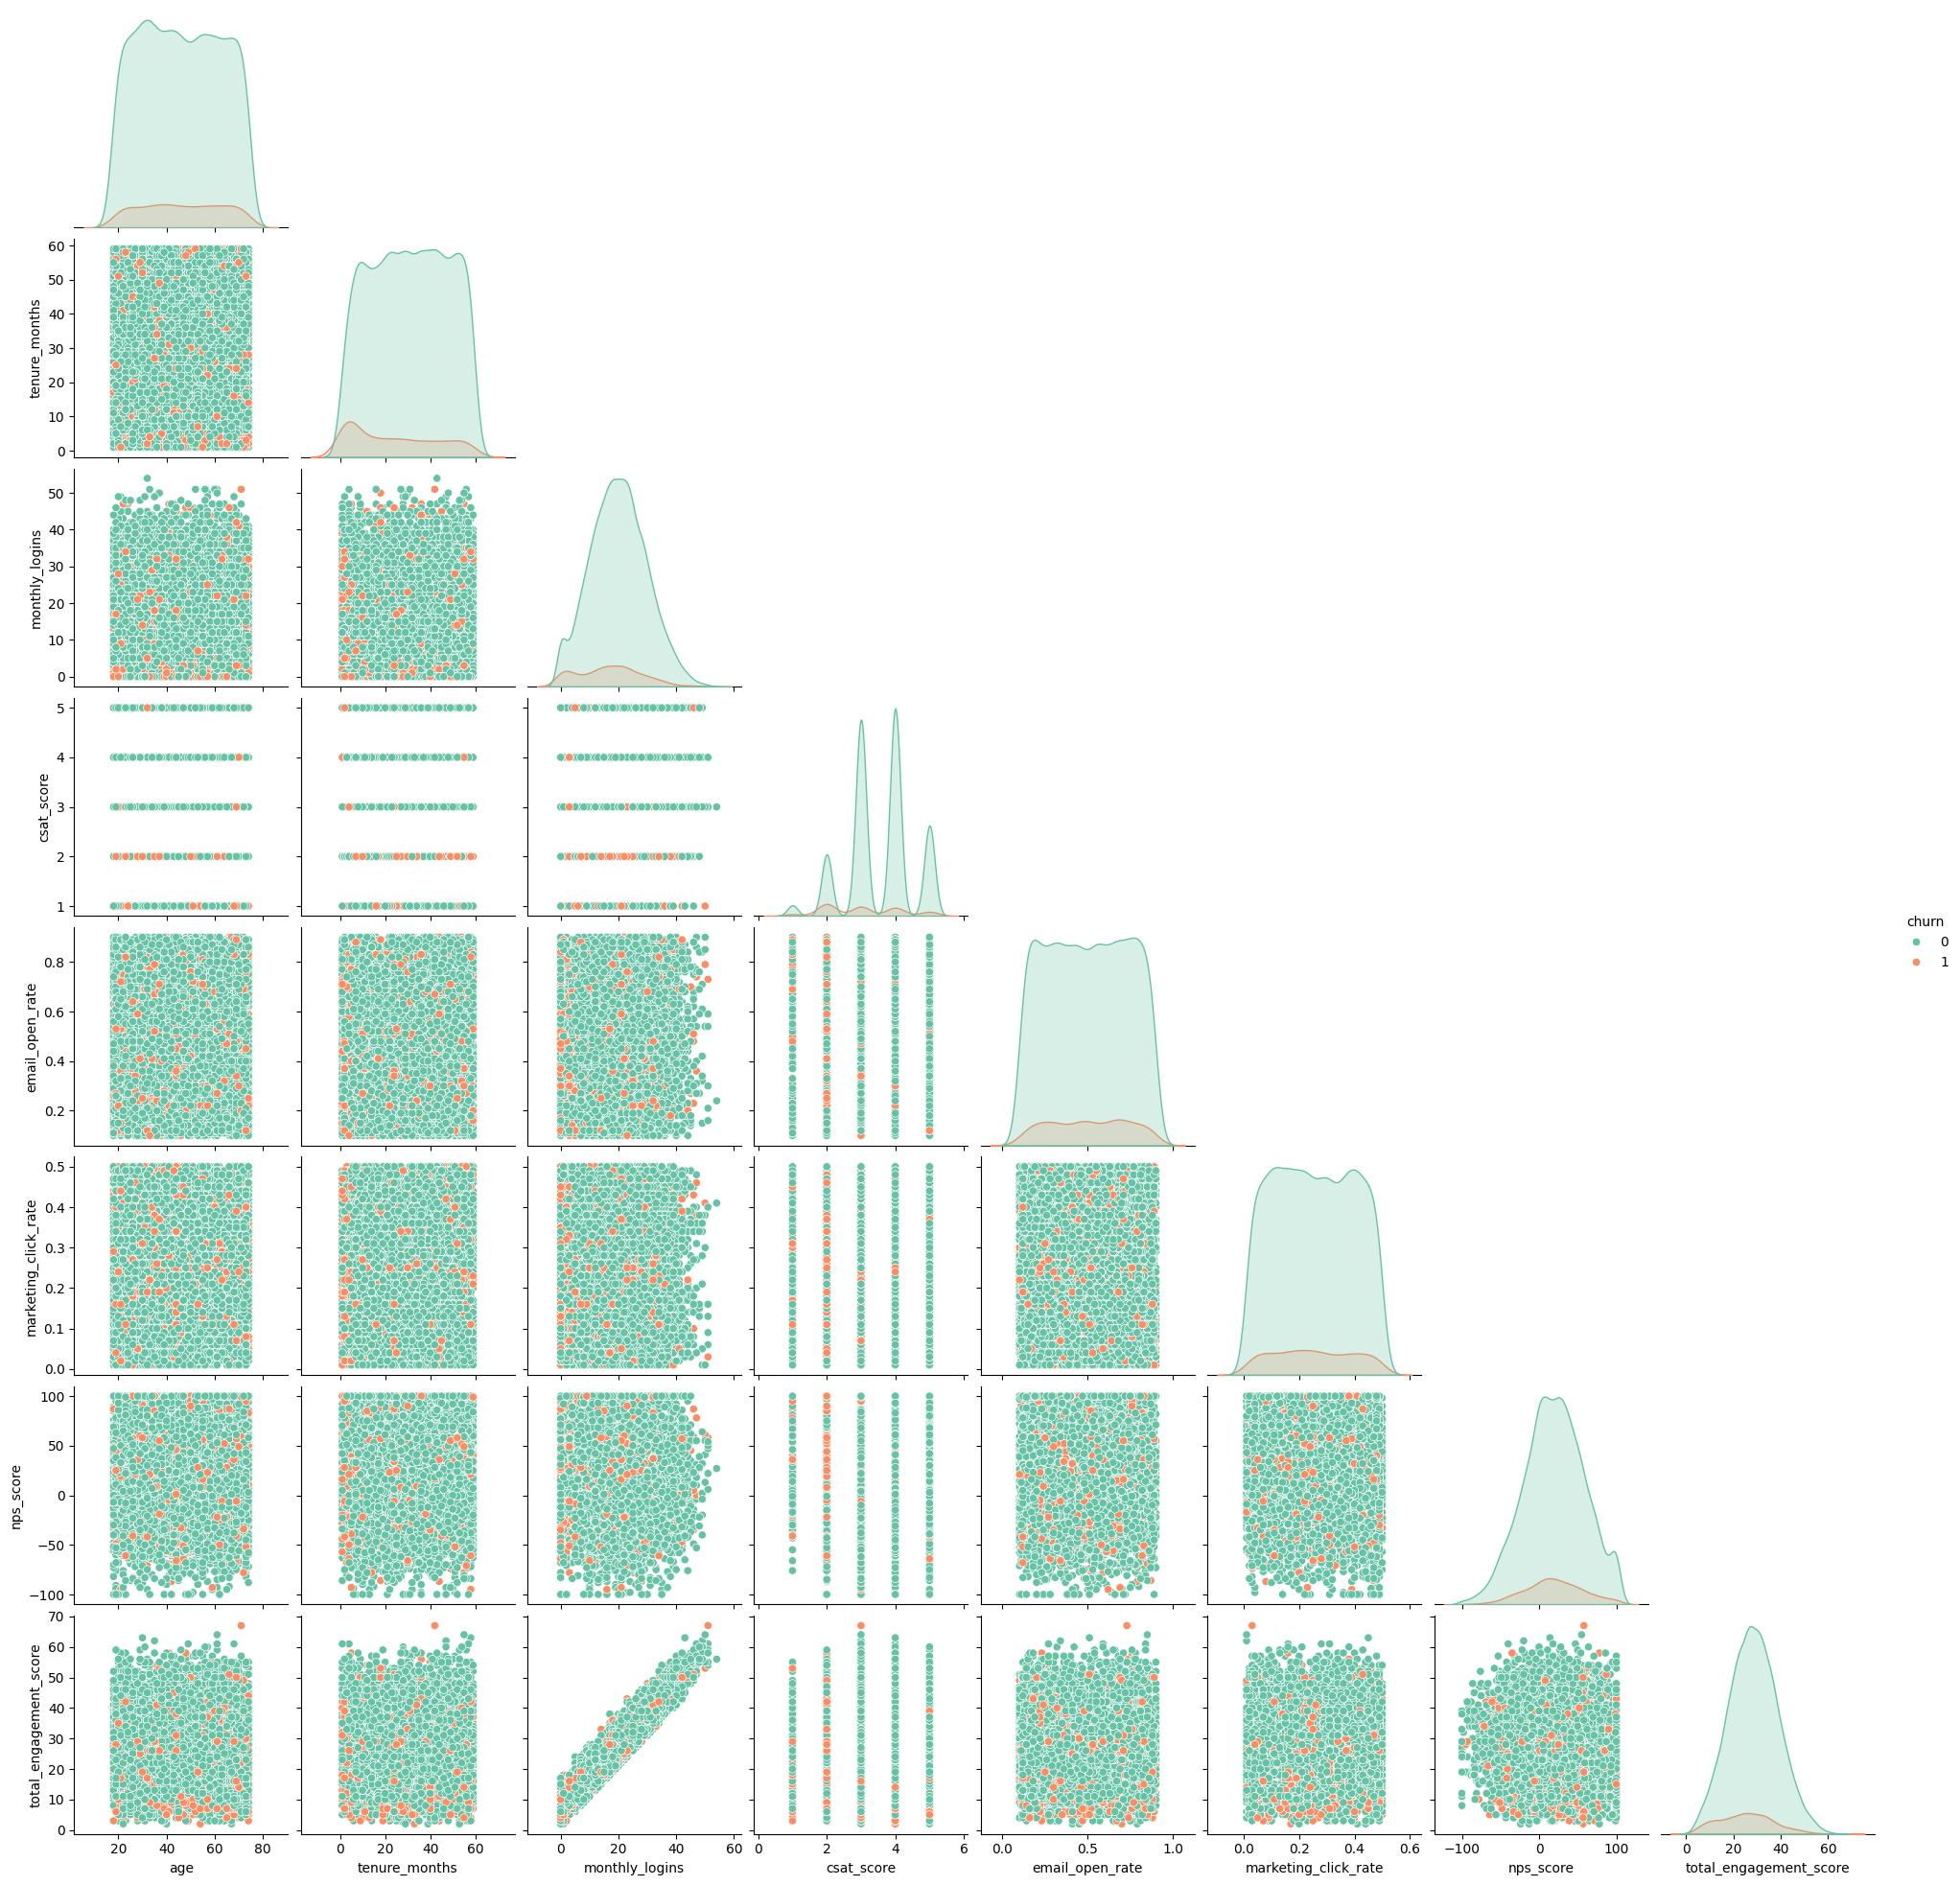

In [44]:
selected_features = [
    'age',
    'tenure_months',
    'monthly_logins',
    'csat_score',
    'email_open_rate',
    'marketing_click_rate',
    'nps_score',
    'total_engagement_score',
    'churn'
]

sns.pairplot(
    df[selected_features],
    hue='churn',
    palette='Set2',
    diag_kind='kde',
    corner=True
)
plt.show()


**Insights**

-  Tenure vs Churn:
    -  Customers with lower tenure are more likely to churn, while long-term customers mostly remain loyal.

-  Engagement Metrics:
    -  Customers with low monthly logins and low total engagement score show a higher churn tendency.

-  CSAT & NPS:
    -  Low CSAT scores and negative NPS scores strongly correlate with churned customers.

-  Email & Marketing Interaction:
    -  Customers with low email open rates and marketing click rates are more likely to churn.

-  Age Factor:
    -  Age does not show a strong linear relationship with churn, indicating churn is behavior-driven rather than demographic-driven.

-  Feature Relationships:

    -  monthly_logins and total_engagement_score show a positive correlation

-  csat_score and nps_score increase together

    -  Churned customers cluster in low engagement + low satisfaction regions

**Conclusion**
-  This customer churn analysis shows that engagement and satisfaction are the strongest factors influencing churn. Customers with low tenure, low login activity, and poor engagement scores are more likely to leave. CSAT and NPS scores clearly indicate that dissatisfied customers churn more frequently. Monthly contract users exhibit higher churn compared to long-term contracts. Overall, behavioral insights are more valuable than demographic data for churn prediction.